# Signal amplification

In [1]:
import transform

datadir = '../../dataset/signal/amplification'
figuredir = '../../figure/signal/amplification'

duration = 26.84e-3
delays = np.linspace(0, duration, 300)

os.makedirs(figuredir, exist_ok=True)

We are interested in the signal amplitude in dependence of the frequency. Thus we will do a FFT on each segment to identify the dominant frequency and take the maximum voltage as amplitude. Then we compare the different configuration.

In [2]:
runs = {
    'horizontal': {},
    'vertical': {},
}

for run, frames in runs.items():
    for d in delays:
        frames[d] = pd.read_hdf(os.path.join(datadir, f'{run}.h5'), str(d))
        
frames = runs['source'] = {}
        
for d in delays:
    frames[d] = pd.read_hdf(os.path.join(datadir, '../synthesis/horizontal-sinc-off.h5'), str(d))

In [3]:
data_f_to_A = {}

for key, run in runs.items():
    d = data_f_to_A[key] = []

    for t, df in run.items():
        f, P = transform.fft(df.time, df.voltage)
        
        d.append((f[P.argmax()], df.voltage.max()))

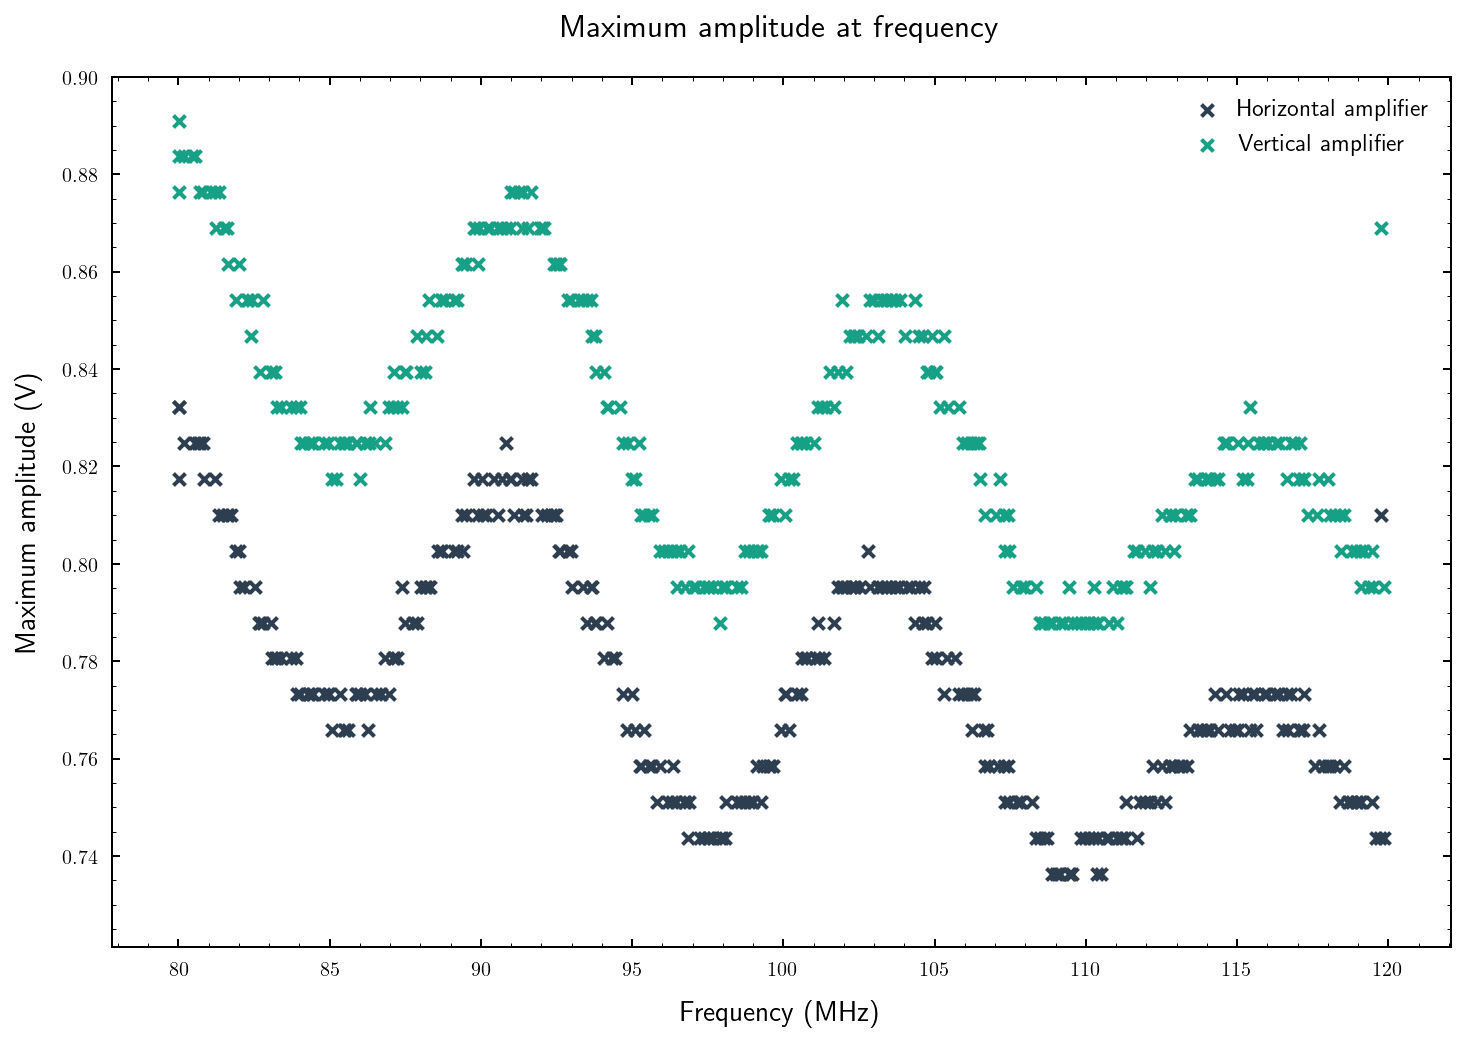

In [8]:
fig = plt.figure(figsize=(12, 8))

f, A = zip(*data_f_to_A['horizontal'])
plt.scatter(np.array(f) / 1e6, A, label='Horizontal amplifier', marker='x', color='#2c3e50')

f, A = zip(*data_f_to_A['vertical'])
plt.scatter(np.array(f) / 1e6, A, label='Vertical amplifier', marker='x', color='#16a085')

plt.title('Maximum amplitude at frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Maximum amplitude (V)')
plt.legend()
fig.savefig(os.path.join(figuredir, 'frequency-max-amplitude.pdf'))
plt.show()

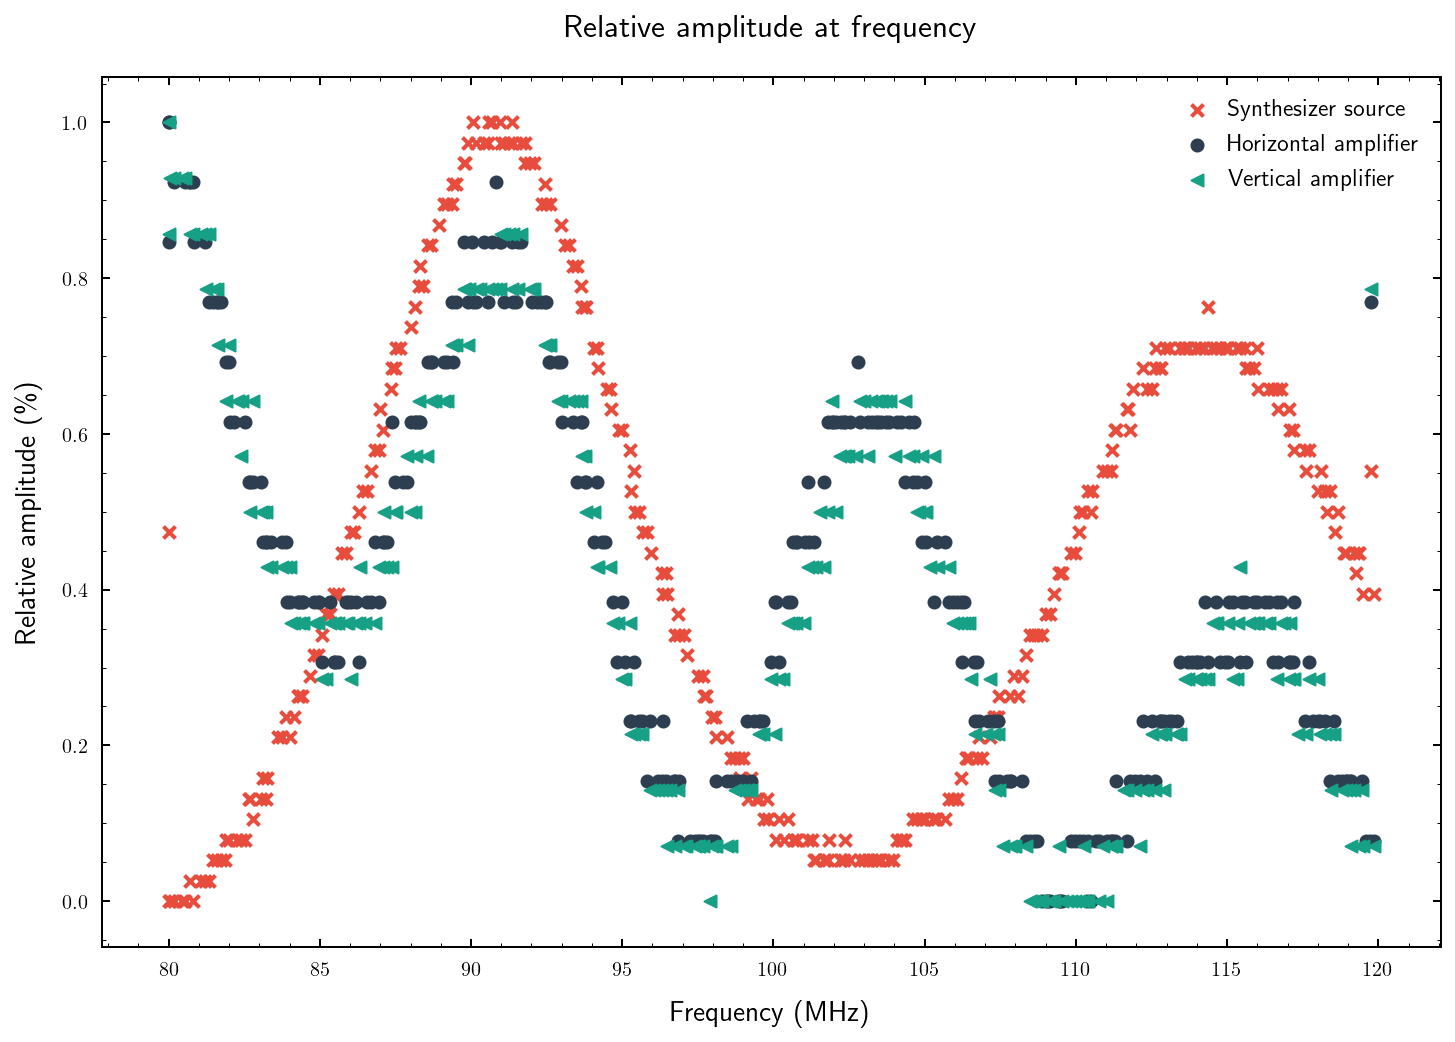

In [12]:
fig = plt.figure(figsize=(12, 8))

fs, As = zip(*data_f_to_A['source'])
fh, Ah = zip(*data_f_to_A['horizontal'])
fv, Av = zip(*data_f_to_A['vertical'])

As = (As - np.min(As)) / (np.max(As) - np.min(As))
Ah = (Ah - np.min(Ah)) / (np.max(Ah) - np.min(Ah))
Av = (Av - np.min(Av)) / (np.max(Av) - np.min(Av))

plt.scatter(np.array(fs) / 1e6, As, label='Synthesizer source', marker='x', color='#e74c3c')
plt.scatter(np.array(fh) / 1e6, Ah, label='Horizontal amplifier', marker='o', color='#2c3e50')
plt.scatter(np.array(fv) / 1e6, Av, label='Vertical amplifier', marker='<', color='#16a085')

plt.title('Relative amplitude at frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative amplitude (\%)')
plt.legend()
fig.savefig(os.path.join(figuredir, 'comparison.pdf'))
plt.show()